# **IMPORTS**

In [1]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, r2_score, mean_squared_error, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
import kagglehub
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\naree\.cache\kagglehub\datasets\pavansubhasht\ibm-hr-analytics-attrition-dataset\versions\1


# **READING THE DATA**

In [3]:
# Load the Dataset
file_path = os.path.join(path, "WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.read_csv(file_path)




In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# **Visulization Of Data**

In [7]:
#representation of categorical features
cat_features=df.select_dtypes(include=object).columns
df[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


In [8]:
num_features=df.select_dtypes(exclude=object).columns
df[num_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

### **VISUALIZATION OF CATEGORICAL DATA**

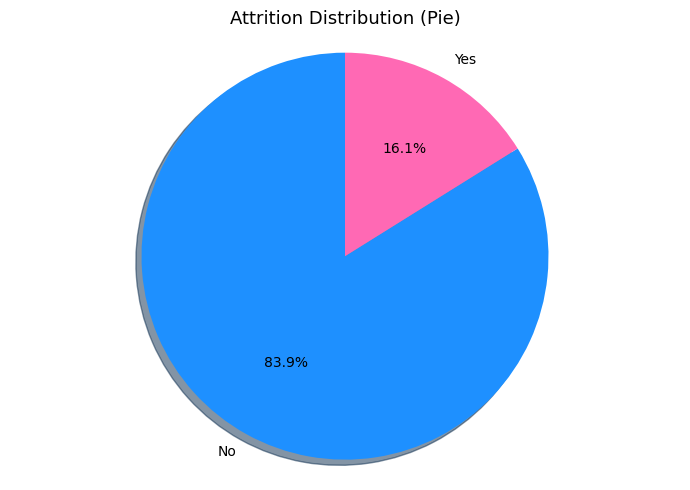

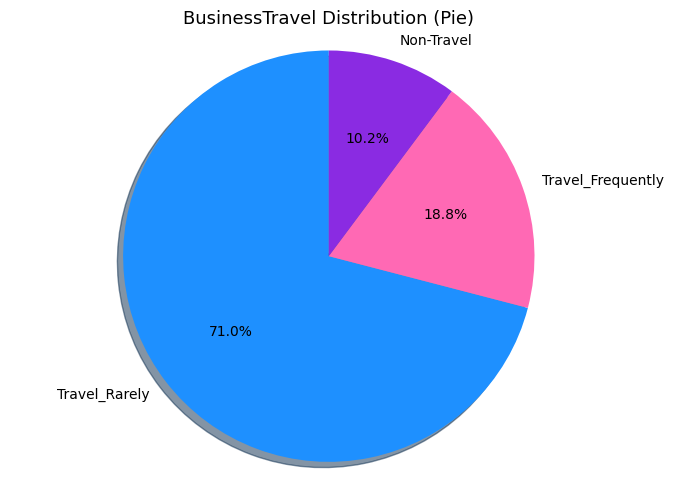

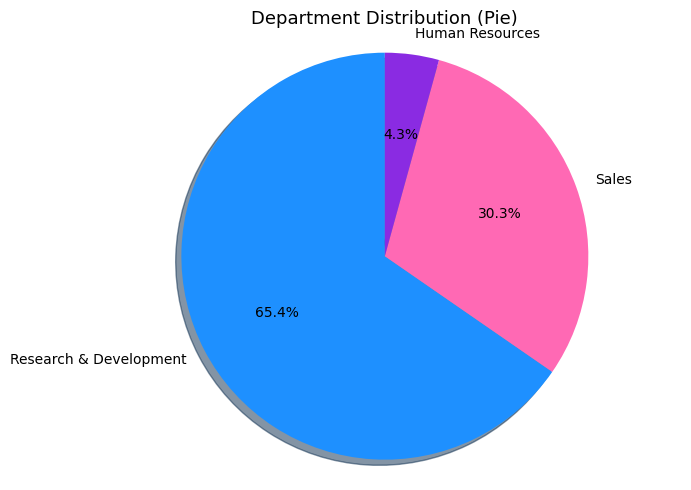

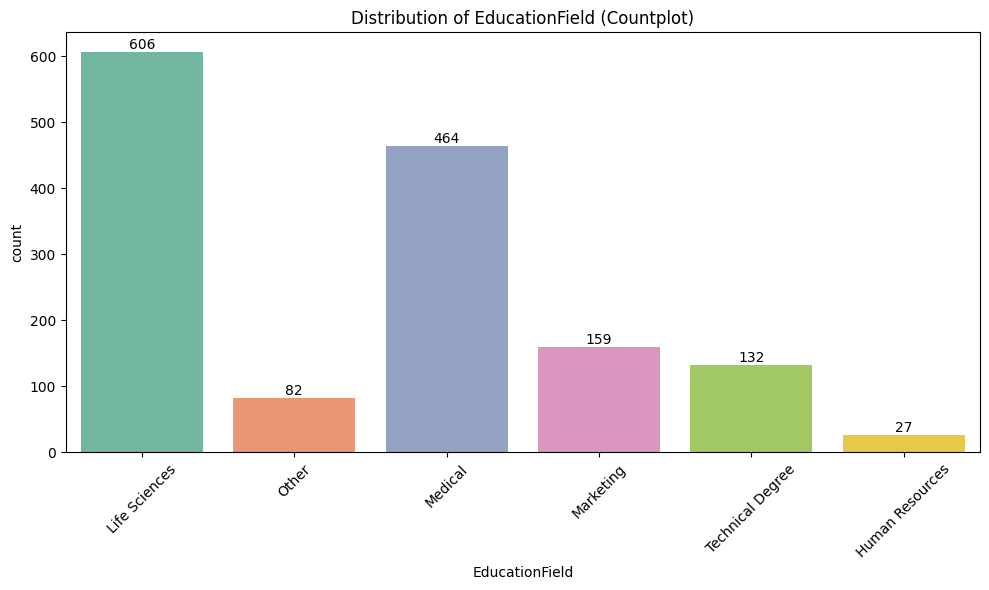

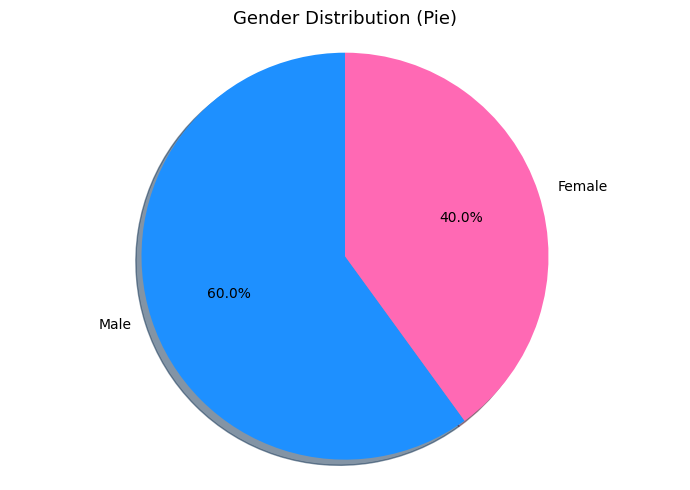

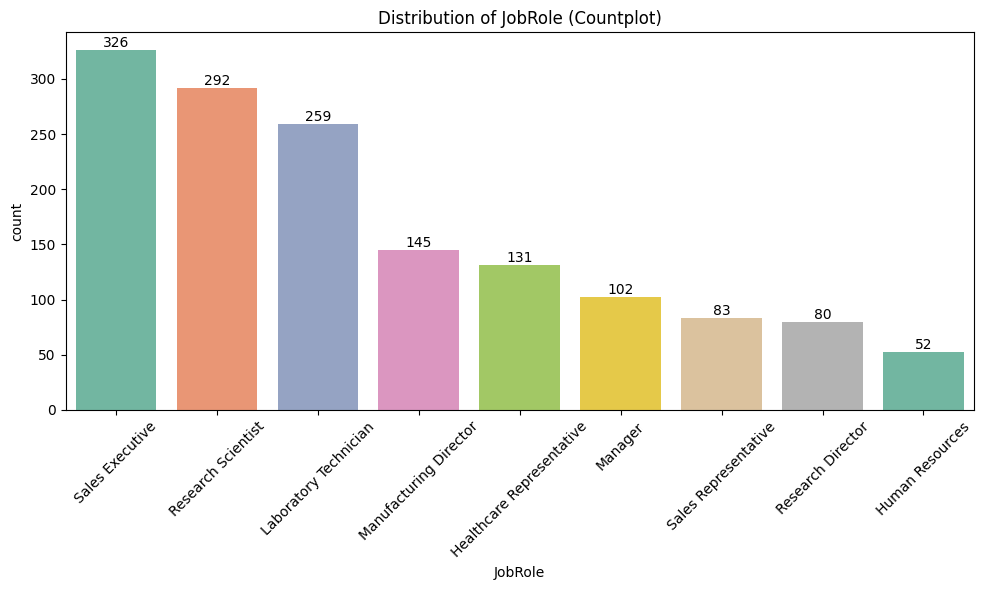

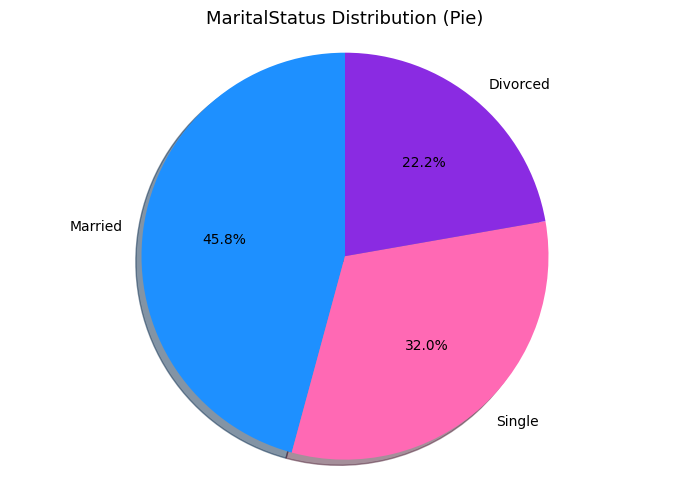

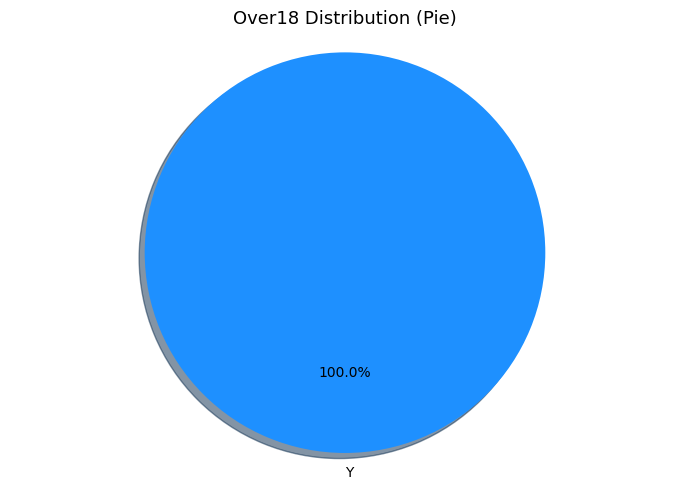

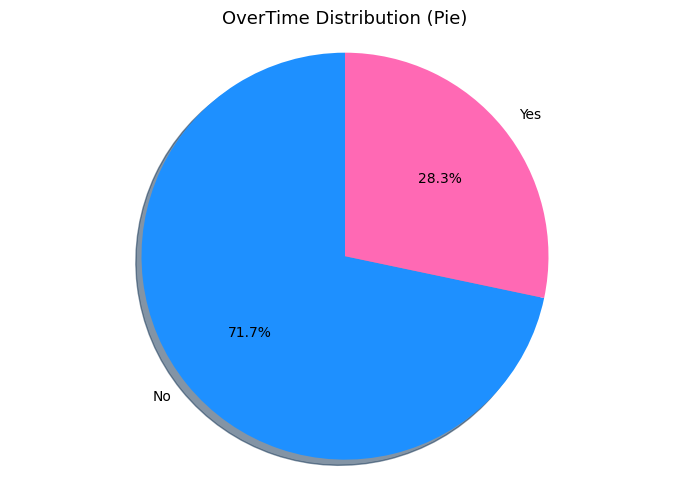

In [9]:
for col in cat_features:
    unique_vals = df[col].nunique()

    if unique_vals <= 5:
        # Pie Chart
        counts = df[col].value_counts()
        colors = ['#1E90FF', '#FF69B4', '#8A2BE2', '#FFD700', '#20B2AA']
        colors2 = ['#A3B6C5', '#E2B3A3','#EACACB', '#ED5E1DF']


        plt.figure(figsize=(7, 5))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%',
                startangle=90, colors=colors, shadow=True)
        plt.title(f'{col} Distribution (Pie)', fontsize=13)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

    else:
        # Countplot
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=col, palette='Set2')
        plt.title(f'Distribution of {col} (Countplot)')
        for container in ax.containers:
            ax.bar_label(container)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### **VISUALIZATION OF NUMERICAL DATA**

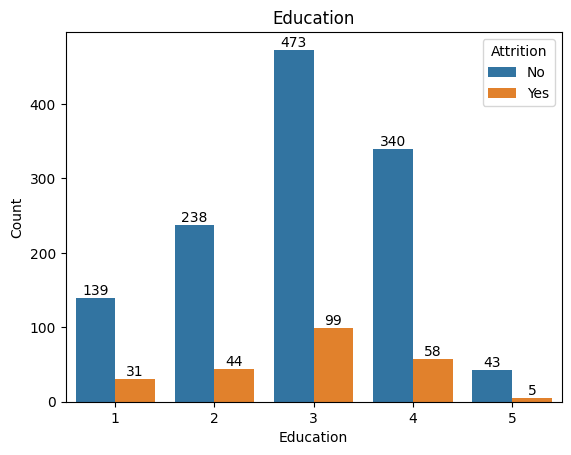

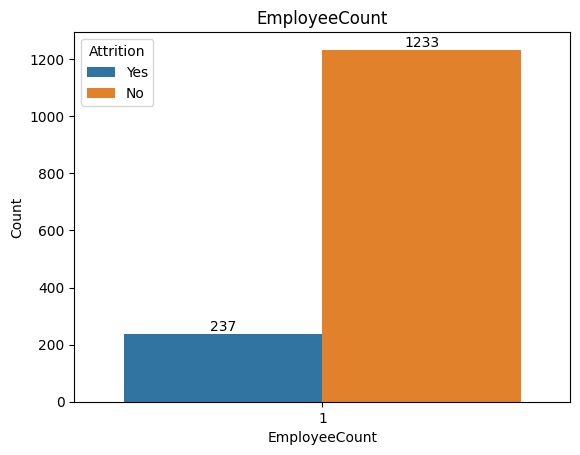

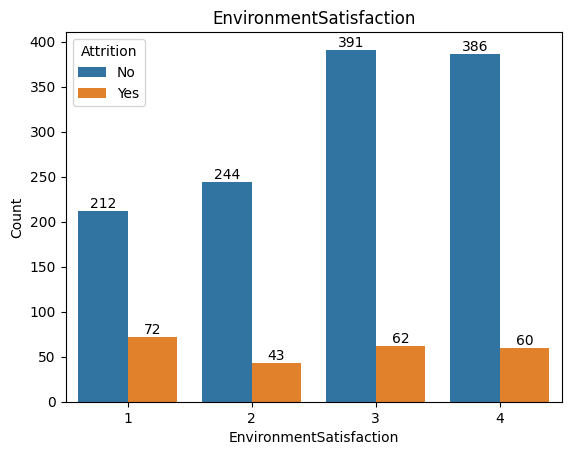

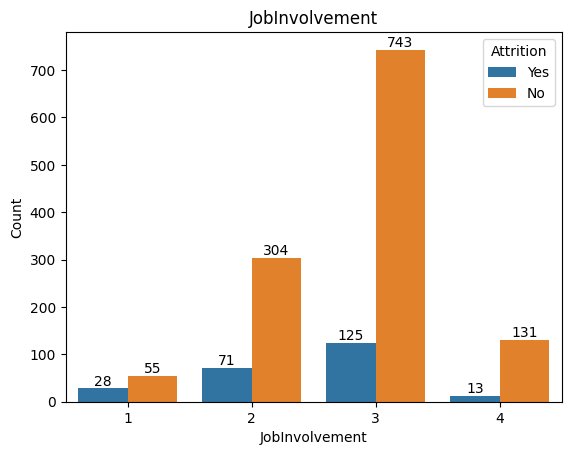

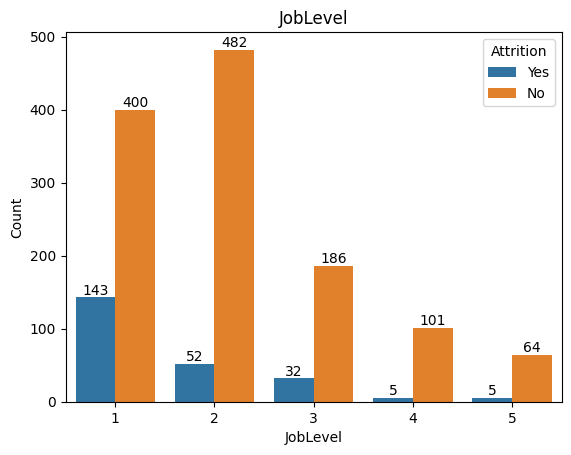

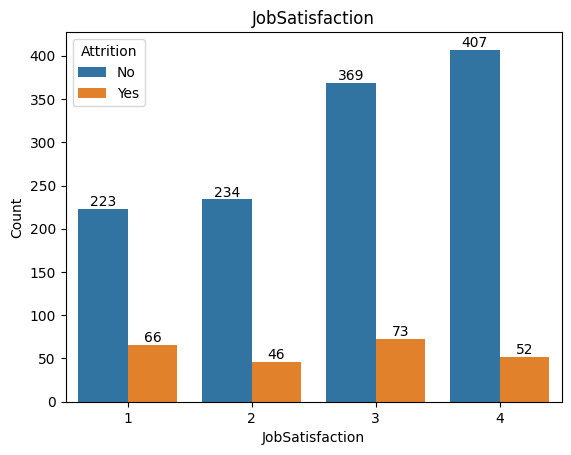

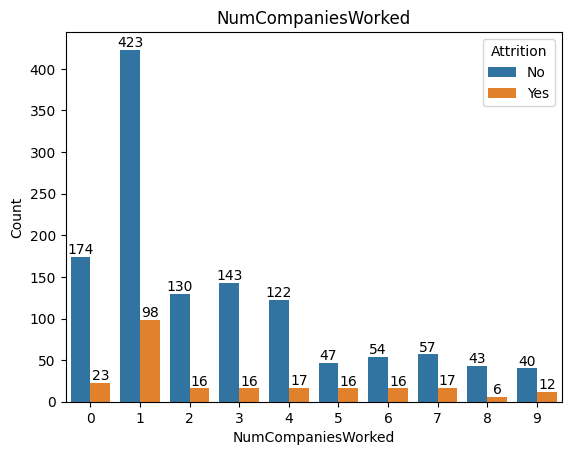

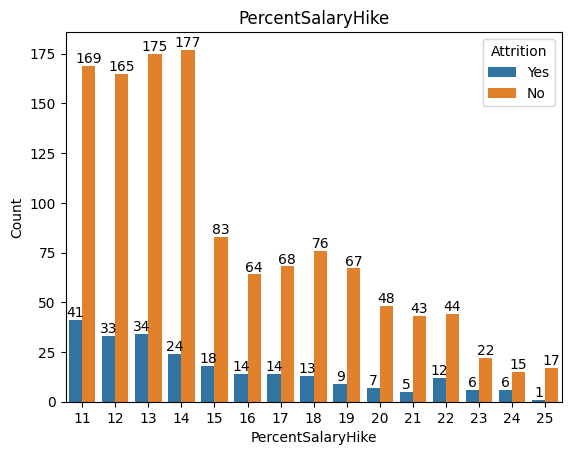

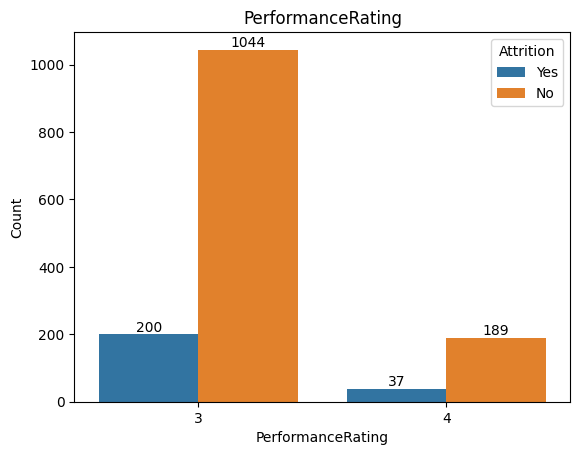

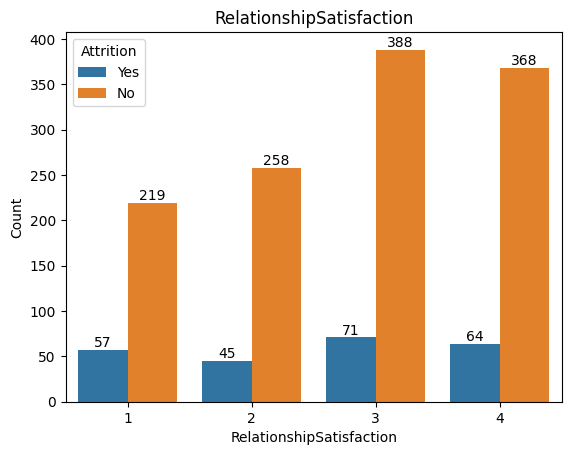

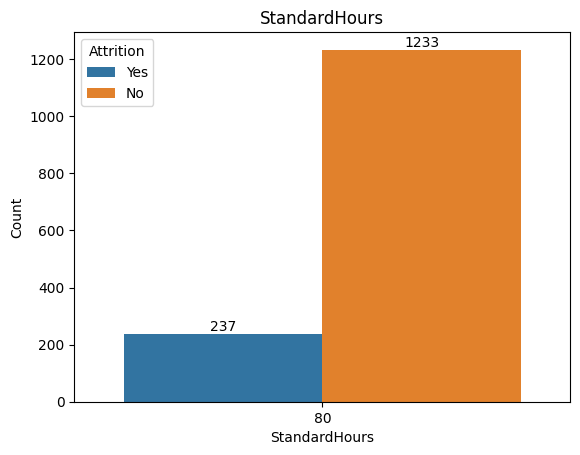

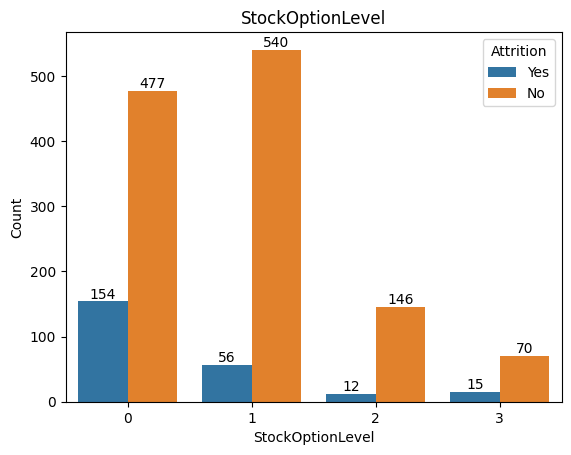

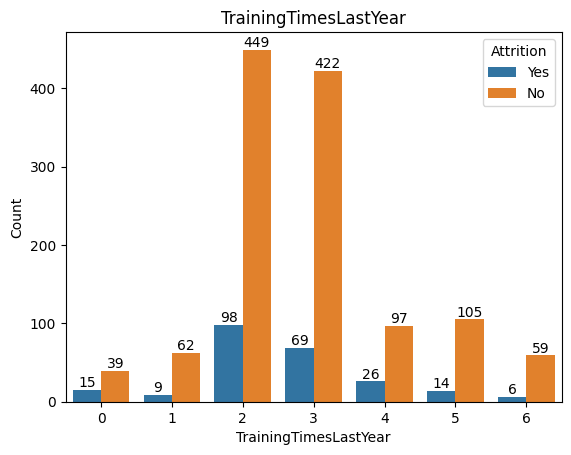

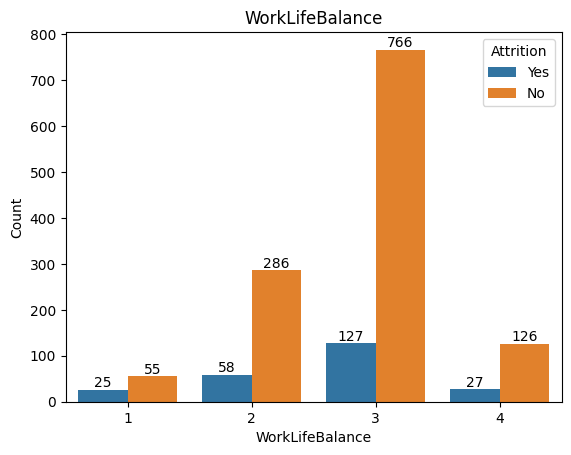

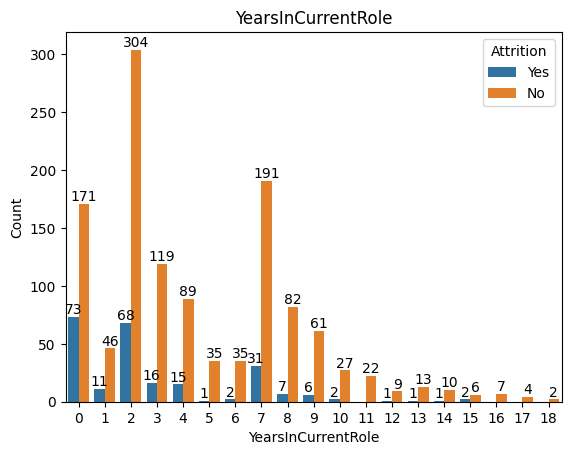

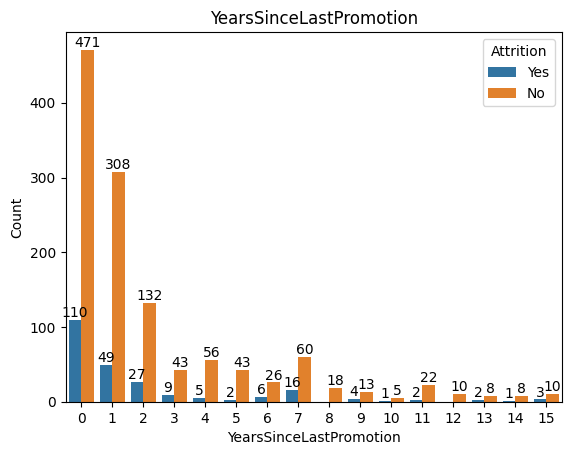

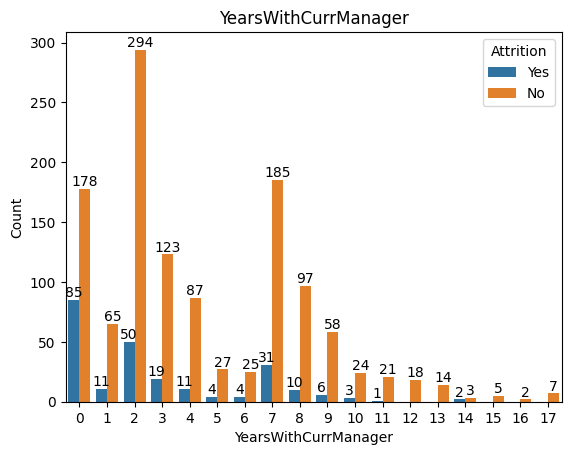

In [10]:
for i in num_features:
    if (df[i].nunique()<=20):
        plt.figure()
        ax=sns.countplot(data=df,x=i,hue='Attrition')
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(i)
        plt.ylabel('Count')
        plt.xlabel(i)
        plt.show()

### **CATEGORICAL DATA VS ATTRITION**

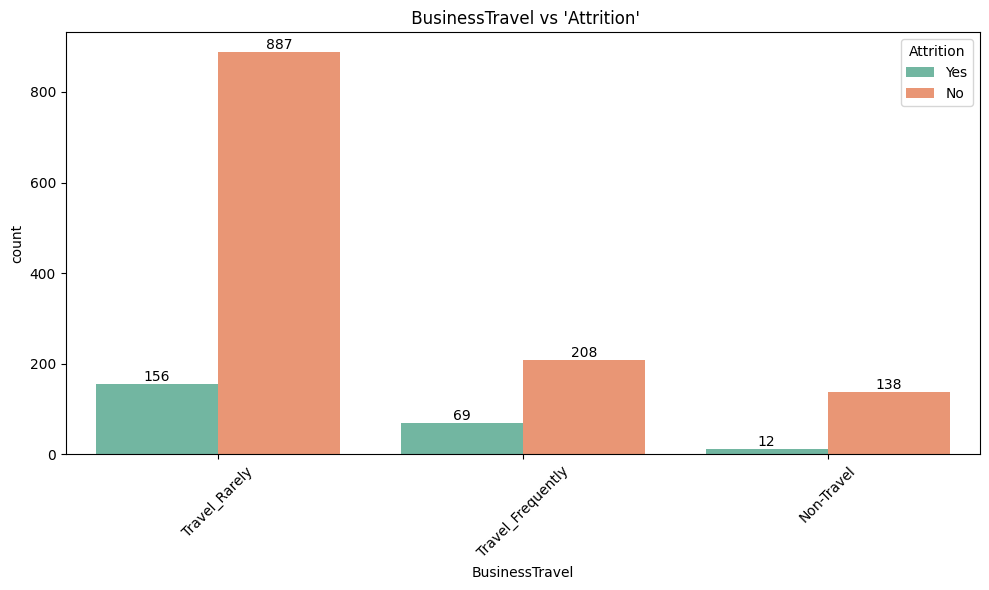

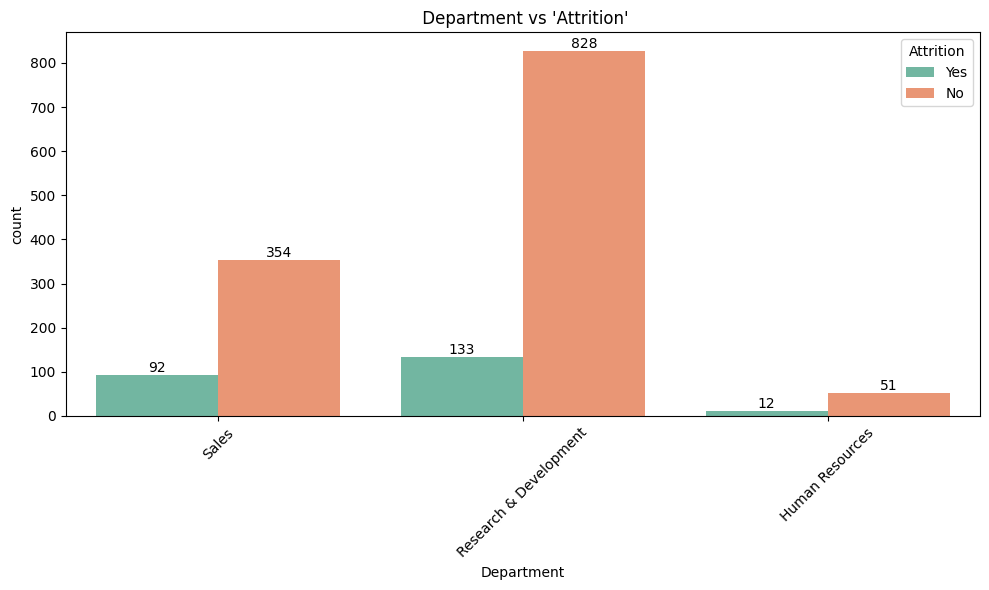

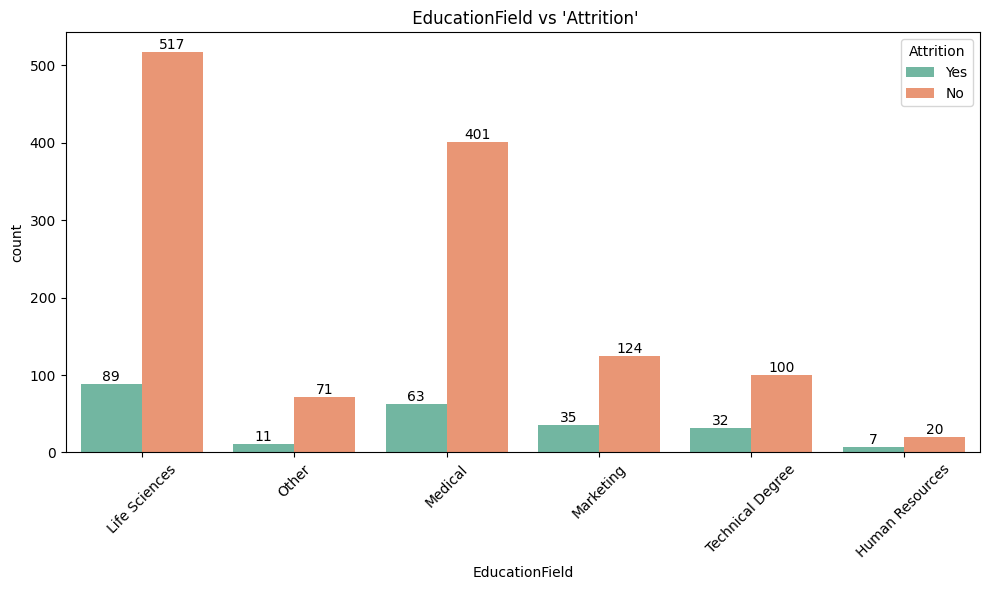

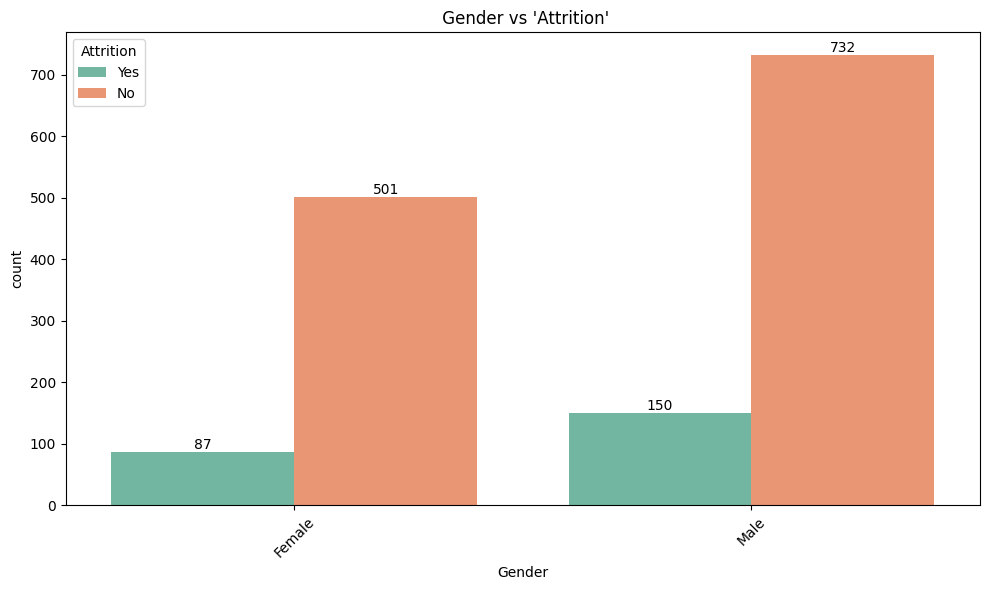

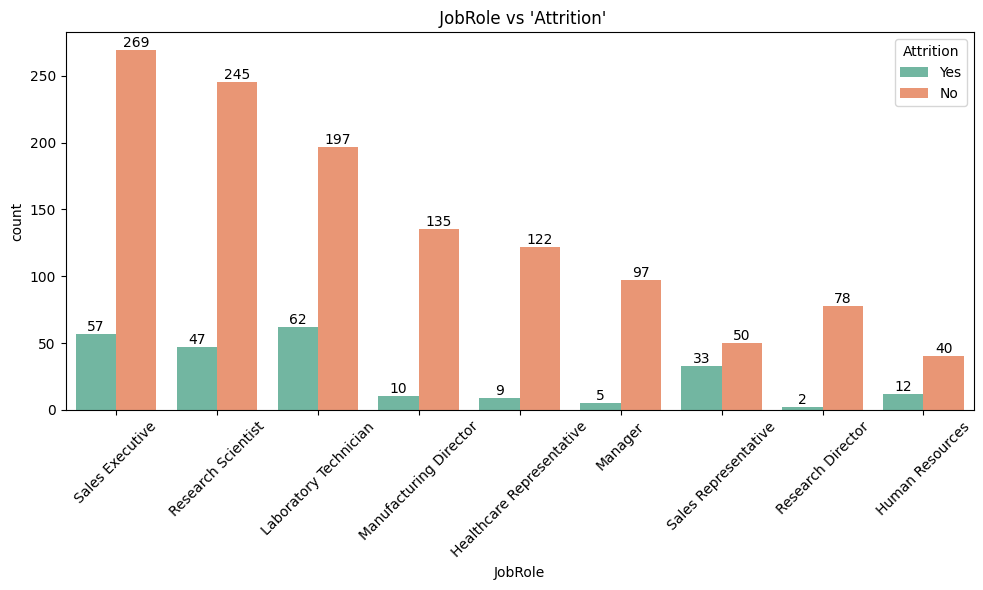

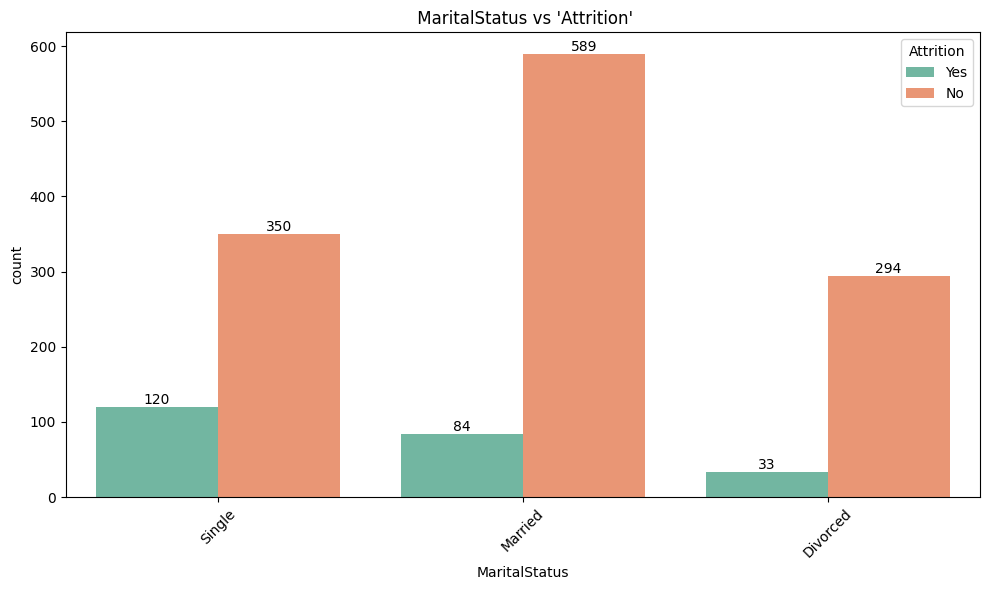

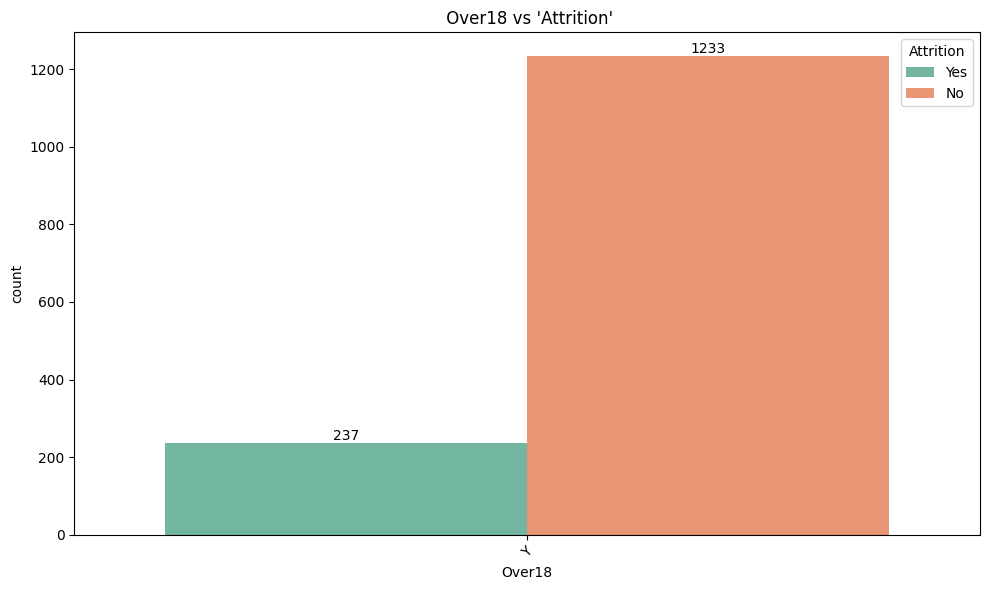

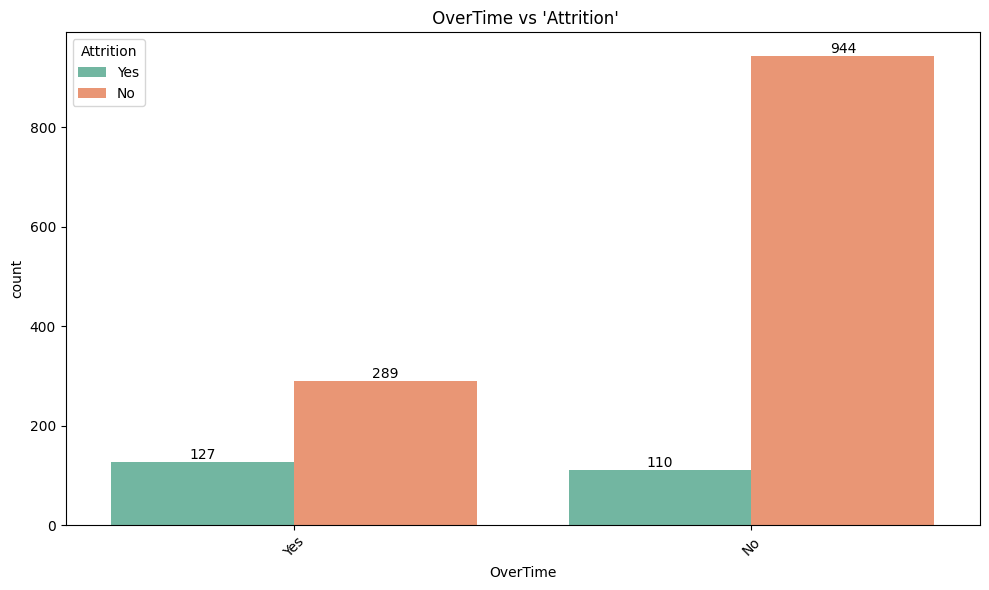

In [11]:
for i in cat_features :
    if i == 'Attrition':
        continue

    plt.figure(figsize=(10,6))
    ax=sns.countplot(data=df ,x=i ,hue='Attrition' ,palette='Set2')
    plt.title(f" {i} vs 'Attrition'")
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **Building the models**

## **Building the reggresion model(PHASE 1)**

### Labeling the data

In [12]:
# Encode Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### Building the model

In [13]:
# Define Features and Target for Classification
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True)
}

results = []

# Train and Evaluate All Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)
    pr_precision, pr_recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(pr_recall, pr_precision)

    print(f"\n {name}")
    print("F1 Score:", round(f1, 4))
    print("ROC AUC Score:", round(roc, 4))
    print("Precision-Recall AUC:", round(pr_auc, 4))

    results.append({
        'model': name,
        'classifier': model,
        'f1': f1,
        'roc_auc': roc,
        'pr_auc': pr_auc,
        'average_score': (f1 + roc + pr_auc) / 3
    })


best_model = max(results, key=lambda x: x['average_score'])
attrition_model = best_model['classifier']

print(f"\n Best Model: {best_model['model']} with Average Score: {best_model['average_score']:.4f}")

# Predict
y_pred = attrition_model.predict(X_test)
y_pred_proba = attrition_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1



 Logistic Regression
F1 Score: 0.3279
ROC AUC Score: 0.7567
Precision-Recall AUC: 0.4708

 Decision Tree
F1 Score: 0.3168
ROC AUC Score: 0.5933
Precision-Recall AUC: 0.3711

 SVM
F1 Score: 0.0
ROC AUC Score: 0.5023
Precision-Recall AUC: 0.1838

 Best Model: Logistic Regression with Average Score: 0.5185


### Visualizing the accuracy of each model

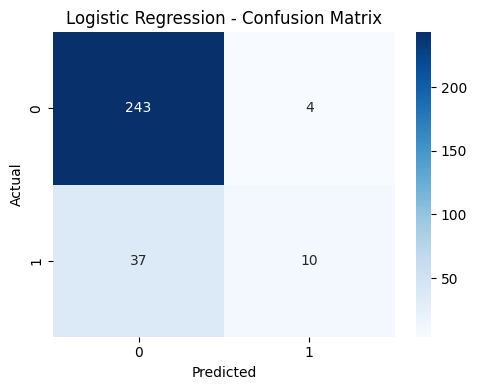

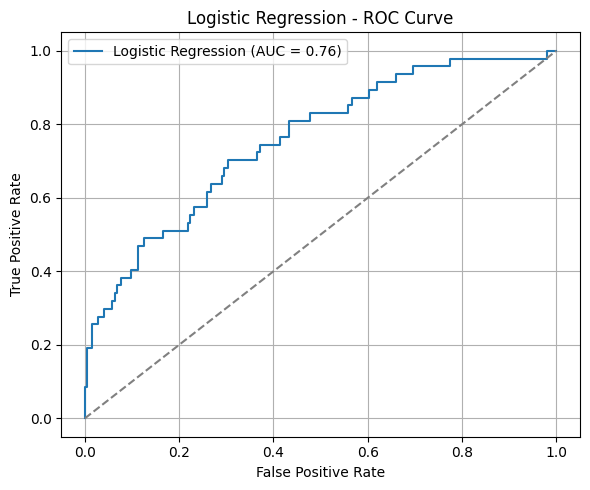

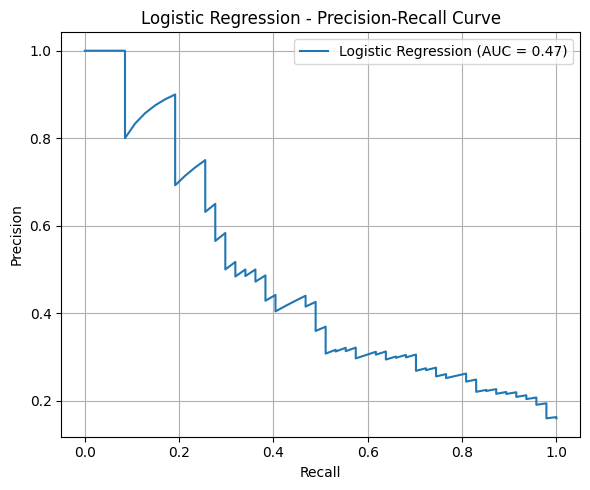

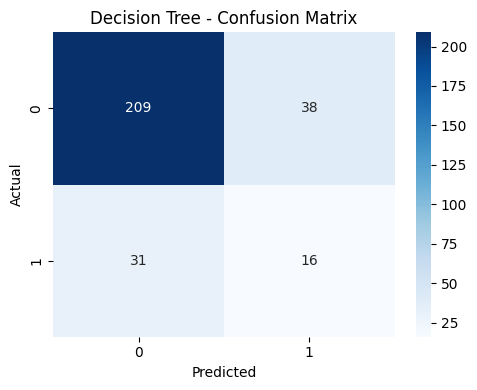

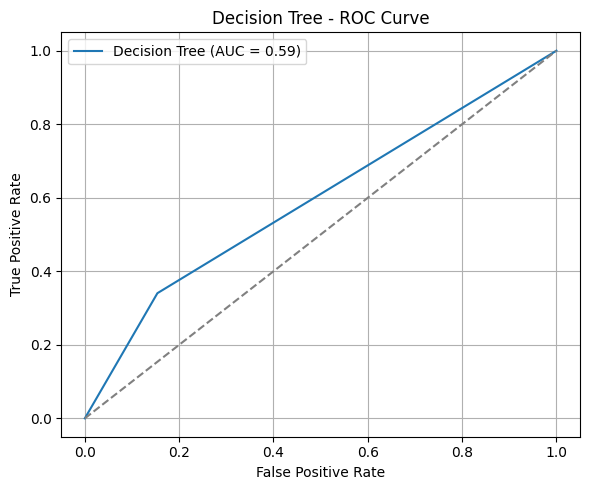

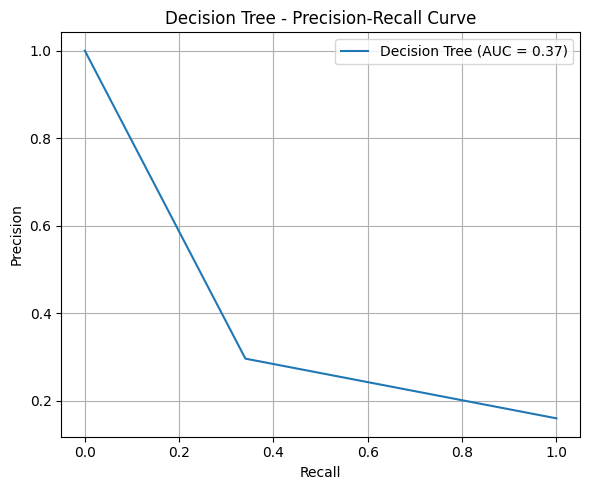

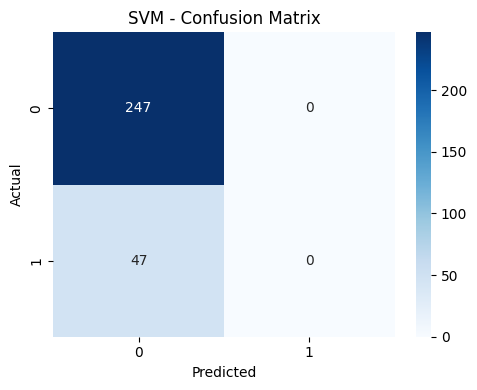

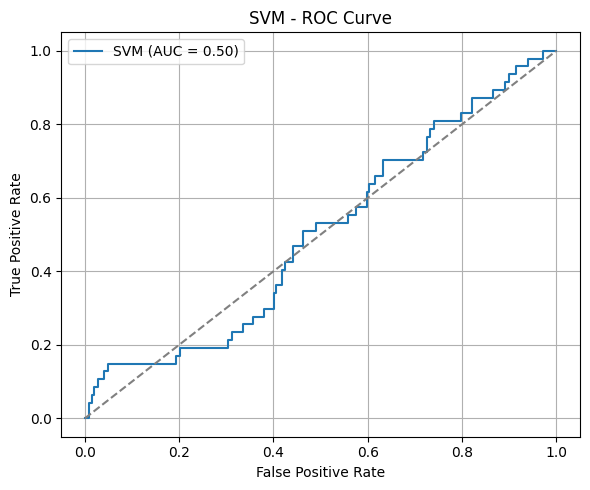

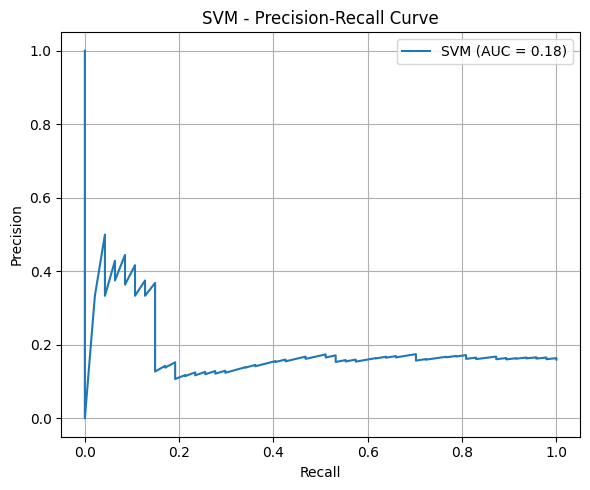

In [14]:
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Store results
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    pr_precision, pr_recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(pr_recall, pr_precision)
    model_results[name] = {
        "model": model,
        "f1": f1,
        "roc_auc": roc,
        "pr_auc": pr_auc,
        "y_pred": y_pred,
        "y_proba": y_proba
    }

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc:.2f})')
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3. Precision-Recall Curve
    plt.figure(figsize=(6,5))
    plt.plot(pr_recall, pr_precision, label=f'{name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"{name} - Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## **Estimation of Salary(PHASE 2)**

### Adding a new feature to the dataframe

In [15]:
# Add Increment and Future Salary Columns
df["Increment"] = df["PerformanceRating"].apply(lambda x: 1.10 if x == 4 else 1.05)
df["FutureSalary"] = df["MonthlyIncome"] * df["Increment"]


In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Increment,FutureSalary
0,41,1,2,1102,2,1,2,1,1,1,...,0,8,0,1,6,4,0,5,1.05,6292.65
1,49,0,1,279,1,8,1,1,1,2,...,1,10,3,3,10,7,1,7,1.10,5643.00
2,37,1,2,1373,1,2,2,4,1,4,...,0,7,3,3,0,0,0,0,1.05,2194.50
3,33,0,1,1392,1,3,4,1,1,5,...,0,8,3,3,8,7,3,0,1.05,3054.45
4,27,0,2,591,1,2,1,3,1,7,...,1,6,3,3,2,2,2,2,1.05,3641.40


## **Building the Reggresion model to estimate future salaries(PHASE 3)**

### Building the model

In [17]:
# Define Features and Target for Salary Prediction
X_salary = df.drop(['Attrition', 'FutureSalary', 'Increment'], axis=1)
y_salary = df['FutureSalary']

# Train/Test Split
X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

# Scale for models sensitive to feature magnitude
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sal)
X_test_scaled = scaler.transform(X_test_sal)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

regressors = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR()
}

regression_results = []

for name, model in regressors.items():
    # Use scaled data for SVR, Ridge, and Lasso
    if name in ['Ridge', 'Lasso', 'SVR']:
        model.fit(X_train_scaled, y_train_sal)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_sal, y_train_sal)
        y_pred = model.predict(X_test_sal)

    r2 = r2_score(y_test_sal, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_sal, y_pred))
    mape = mean_absolute_percentage_error(y_test_sal, y_pred)

    print(f"\n {name}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    # Normalize RMSE to [0,1] scale for fair average (1 - RMSE/max_rmse)
    regression_results.append({
        'model': name,
        'regressor': model,
        'r2': r2,
        'rmse': rmse,
        'mape': mape,
        'score': (r2 + (1 - rmse / y_test_sal.max()) + (1 - mape / 100)) / 3
    })


best_regressor = max(regression_results, key=lambda x: x['score'])
salary_regressor = best_regressor['regressor']

print(f"\n Best Regressor: {best_regressor['model']} with Combined Score: {best_regressor['score']:.4f}")

# Train Regressor
salary_regressor.fit(X_train_sal, y_train_sal)

# Predict
y_pred_sal = salary_regressor.predict(X_test_sal)


 Random Forest
R² Score: 0.9994
RMSE: 122.22
MAPE: 0.77%

 Ridge
R² Score: 0.9997
RMSE: 85.46
MAPE: 0.83%

 Lasso
R² Score: 0.9997
RMSE: 82.80
MAPE: 0.77%

 SVR
R² Score: -0.2215
RMSE: 5458.96
MAPE: 47.06%

 Best Regressor: Lasso with Combined Score: 0.9960


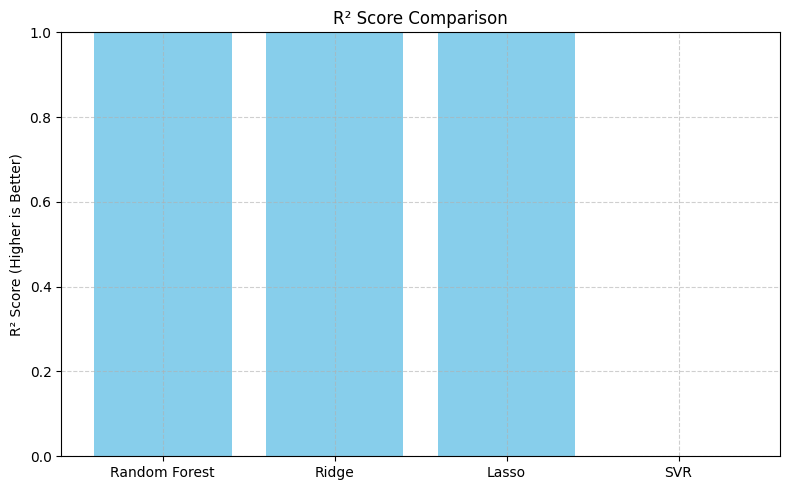

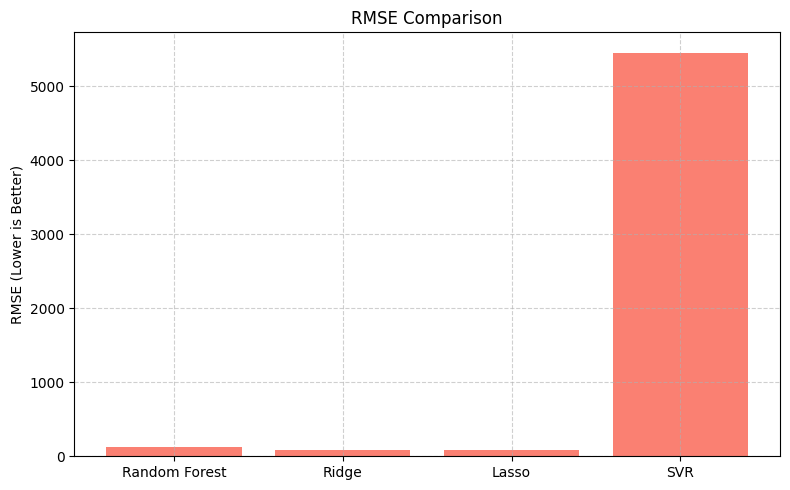

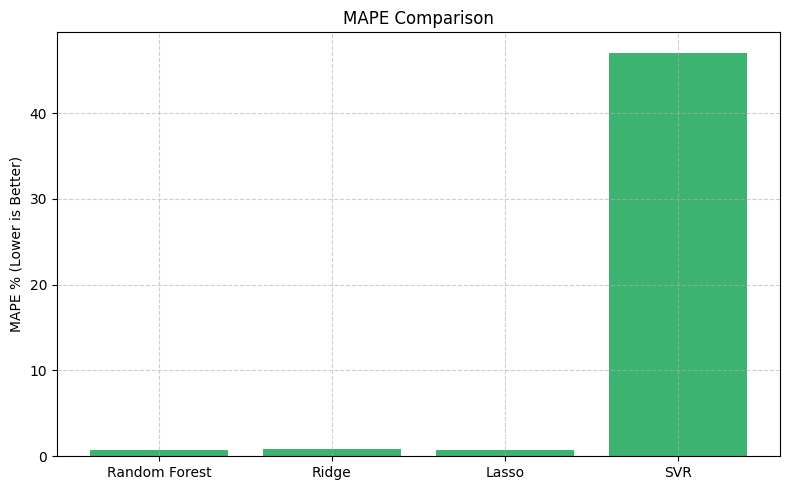

In [18]:
models = [r['model'] for r in regression_results]
r2_scores = [r['r2'] for r in regression_results]
rmse_scores = [r['rmse'] for r in regression_results]
mape_scores = [r['mape'] for r in regression_results]


# Plot R² Scores
plt.figure(figsize=(8,5))
plt.bar(models, r2_scores, color='skyblue')
plt.title('R² Score Comparison')
plt.ylabel('R² Score (Higher is Better)')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(8,5))
plt.bar(models, rmse_scores, color='salmon')
plt.title('RMSE Comparison')
plt.ylabel('RMSE (Lower is Better)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot MAPE
plt.figure(figsize=(8,5))
plt.bar(models, mape_scores, color='mediumseagreen')
plt.title('MAPE Comparison')
plt.ylabel('MAPE % (Lower is Better)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Visualizing actual vs predicted for accuracy

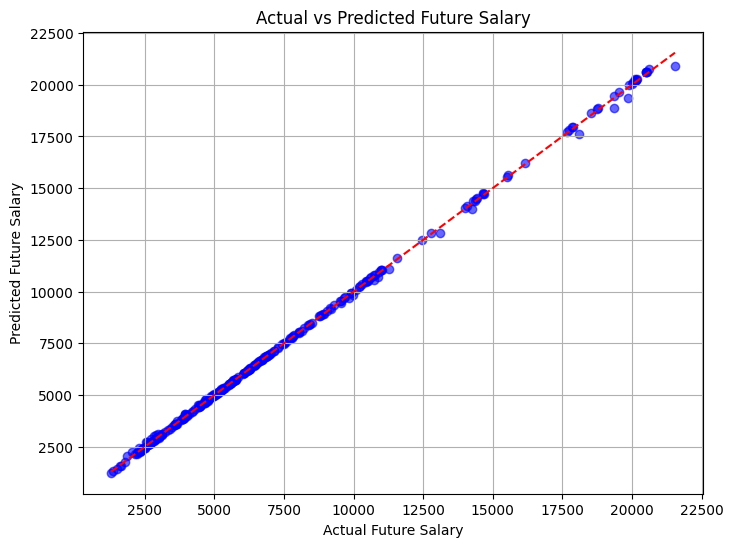

In [19]:
# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_sal, y_pred_sal, color='blue', alpha=0.6)
plt.plot([y_test_sal.min(), y_test_sal.max()], [y_test_sal.min(), y_test_sal.max()], color='red', linestyle='--')
plt.xlabel('Actual Future Salary')
plt.ylabel('Predicted Future Salary')
plt.title('Actual vs Predicted Future Salary')
plt.grid(True)
plt.show()


## **Identifying Employees likely to stay(PHASE 4)**

In [20]:
# Get Probability of Staying
probs = attrition_model.predict_proba(X)
P_stay = 1 - probs[:, 1]

# Filter employees likely to stay
stay_mask = (P_stay > 0.6)
X_likely_to_stay = X_salary[stay_mask]

# Predict their Future Salaries
predicted_future_salaries = salary_regressor.predict(X_likely_to_stay)

# Final DataFrame
final_likely_to_stay = X_likely_to_stay.copy()
final_likely_to_stay['PredictedFutureSalary'] = predicted_future_salaries
final_likely_to_stay.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PredictedFutureSalary
0,41,2,1102,2,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,6261.965241
1,49,1,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,5677.321644
2,37,2,1373,1,2,2,4,1,4,4,...,80,0,7,3,3,0,0,0,0,2152.634899
3,33,1,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,3026.934465
5,32,1,1005,1,2,2,1,1,8,4,...,80,0,8,2,2,7,7,3,6,3205.025286


## **Calculating Expected Loss(PHASE 5)**

In [21]:
# Predict Probabilities for Attrition Again
P_leave = probs[:, 1]

# Predict Future Salaries for All
future_salary_all = salary_regressor.predict(X_salary)

# Calculate Expected Loss
expected_loss = P_leave * future_salary_all

# Final DataFrame
final_risk_df = pd.DataFrame({
    'P_leave': P_leave,
    'FutureSalary': future_salary_all,
    'ExpectedLoss': expected_loss
})

# Sort by Expected Loss
final_risk_df = final_risk_df.sort_values(by='ExpectedLoss', ascending=False)

# Total Expected Loss
total_expected_loss = expected_loss.sum()
print("\nTotal Expected Salary Loss Across Company: ${:,.2f}".format(total_expected_loss))



Total Expected Salary Loss Across Company: $1,198,181.71


### Representing most valuable employees

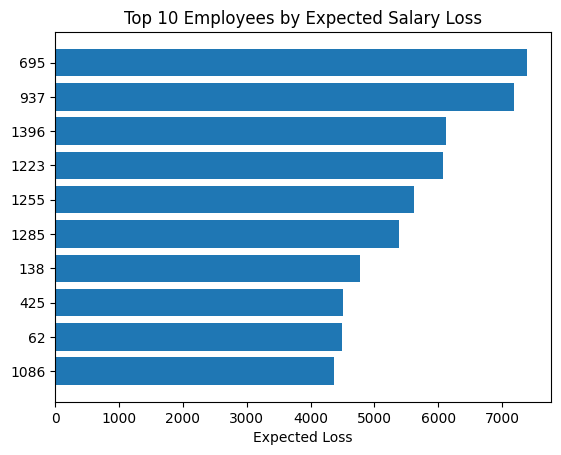

In [22]:
top_loss = final_risk_df.head(10)
plt.barh(top_loss.index.astype(str), top_loss['ExpectedLoss'])
plt.xlabel("Expected Loss")
plt.title("Top 10 Employees by Expected Salary Loss")
plt.gca().invert_yaxis()
plt.show()
